This tool plots the lr grid.

In [12]:
exp_name = 'federated-learning-emnist/3400c1e1500r10f-yogi-r-sgd'
metric = "last100_avg_acc"

In [13]:
import os
os.chdir('../..')

In [14]:
import comet_ml
from comet_ml.query import Parameter
import pandas as pd
import numpy as np

import plotly.express as px

from mutil.cometml.apiquery import exp_metrics2list, exp_params2list

In [15]:
comet_api = comet_ml.api.API()

exps = comet_api.get(exp_name)

In [16]:
def get_df(exps):
    c_lr = exp_params2list(exps, "CLIENT_LEARNING_RATE", float)
    s_lr = exp_params2list(exps, "SERVER_LEARNING_RATE", float)
    teas = exp_metrics2list(exps, metric, float)
    return pd.DataFrame({"acc": teas, "c_lr": c_lr, "s_lr": s_lr})

In [17]:
df = get_df(exps)

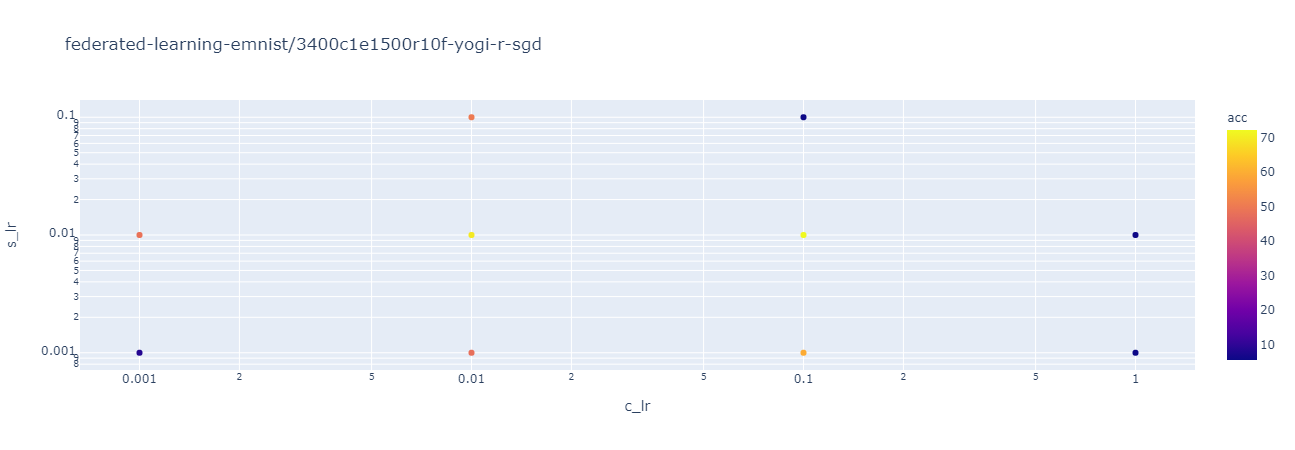

In [18]:
fig = px.scatter(df, x="c_lr", y="s_lr", 
     color="acc", log_x=True, log_y=True, size_max=60, title=exp_name)
fig.show()